# Final Report - Data Science
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

Gabriel mariani Ribeiro Santos - gabriel.mariani@pucpr.edu.br

Henrique Marques - h.marques@pucpr.edu.br

Vinicius Marques - vinicius.oliveira5@pucpr.edu.br

2023

# Source Dataset

Global Weather: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository


## Import

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns

from datetime import datetime
from IPython.display import Markdown as md
from scipy import stats
plt.style.use('ggplot')

import plotly.express as px
# pd.set_options('max_columns', 200)

## Configurations

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/vmsou/BCC-DS-TDE/master/assets/GlobalWeatherRepository.csv" # @param {type:"string"}

## Functions

In [ ]:
def skew_to_str(value):
    if value > -0.5 and value < 0.5:
        return "Fairly Symmetrical"
    elif value > -1 and value < 0.5:
        return "Moderately Skewed"
    elif value > 1 or value < -1:
        return "Highly Skewed"


def kurt_to_str(value):
    if value > 3:
        return "Leptokurtic"
    if value < 3:
        return "Platykurtic"
    else:
        return "Mesokurtic"

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [ ]:
df = pd.read_csv(DATA_PATH, sep=',')

In [ ]:
#@title Sample
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [ ]:
#@title Columns and Types
df.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [ ]:
#@title Drop irrelevant columns
old_cols = len(df.columns)
df = df[['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
      #  'temperature_fahrenheit',
       'condition_text',
      # 'wind_mph',
        'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
      #  'feels_like_fahrenheit',
         'visibility_km',
      #  'visibility_miles',
       'uv_index',
      # 'gust_mph',
         'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']].copy()

cols_removed = old_cols - len(df.columns)
md(f"""
## Columns removed: {cols_removed}
""")


## Columns removed: 5


In [ ]:
#@title Cleanup Data
# Remove duplicates
total_len = len(df)
old_len = len(df)
df.drop_duplicates()
duplicates_removed = old_len - len(df)


#Handle Missing Values
old_len = len(df)
df.fillna(0)
na_removed = old_len - len(df)

md(f"""
## Duplicated removed: {duplicates_removed}
## Missing Removed: {na_removed}
""")


## Duplicated removed: 0
## Missing Removed: 0


In [ ]:
#@title sunrise and sunset datetimes to sun_duration_sec
df['sun_duration_sec'] = (pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])).map(lambda x: x.seconds)
df['sun_duration_sec']

0       46800
1       47700
2       47100
3       47880
4       42900
        ...  
4477    43680
4478    43860
4479    43800
4480    43440
4481    43380
Name: sun_duration_sec, Length: 4482, dtype: int64

In [ ]:
# @title Indifferent classes removed

indifferent_classes = ['Torrential rain shower','Light drizzle','Heavy rain', 'Heavy rain at times', 'Thundery outbreaks possible', 'Moderate rain at times', 'Patchy light drizzle', 'Patchy light rain']

"""
df["condition_text"] = df["condition_text"].map({
    "Torrential rain shower": "NEW",
    'Light drizzle' : "",
    'Heavy rain': "",
    'Heavy rain at times': "",
    'Thunder outbreaks possible': "",
    'Moderate rain at times': "",
    'Patchy light drizzle': "",
    'Patchy light rain' : "",
})
"""

df = df.apply(lambda row: row[~df['condition_text'].isin(indifferent_classes)])



# General Characteristics

This dataset

In this section, you should report the main dataset chracteristics, including but not limited to:
* Number of instances
* Number of features
* Number of classes
* Class distribution

In [ ]:
#@title Columns and Types
df.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
condition_text                   object
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
visibility_km                   float64
uv_index                        float64
gust_kph                        float64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64


In [ ]:
# @title Number of instances
display(len(df))

4449

In [ ]:
# @title Number of features
display(len(df.columns) - 1)

36

In [ ]:
# @title Number of classes
display(len(df['condition_text'].unique()))

14

Text(0.5, 1.0, 'Class Distribution')

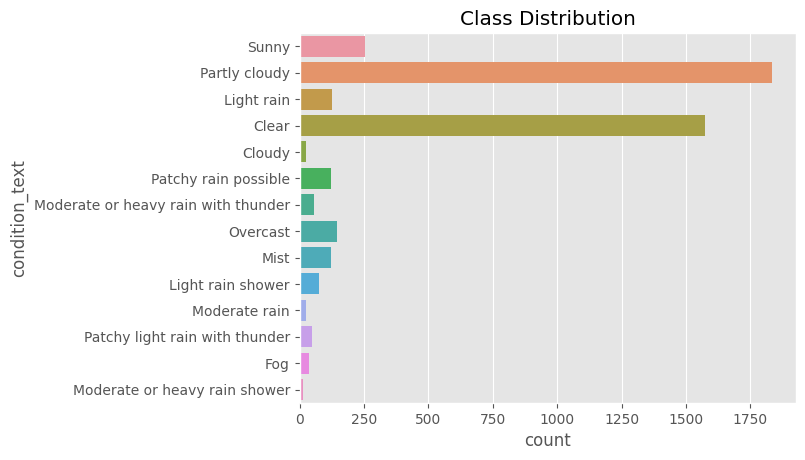

In [ ]:
# @title Class distribution

ax = sns.countplot(data=df,y='condition_text', orient='h')
ax.set_title("Class Distribution", )

In [ ]:
# @title Missing and Duplicates
md(f"""
## Missing: {na_removed}
## Duplicates: {duplicates_removed}
"""
)


## Missing: 0
## Duplicates: 0


# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

Variables
1. temperature_celsius
2. feels_like_celsius
3. wind_kph
4. pressure_mb
5. precip_mm
6. humidity
7. uv_index
8. air_quality_Carbon_Monoxide
9. air_quality_Ozone
10. air_quality_Nitrogen_dioxide
11. air_quality_Sulphur_dioxide
12. air_quality_PM2.5
13. air_quality_PM10
14. air_quality_us-epa-index
15. air_quality_gb-defra-index
16. gust_kph
17. moon_illumination
18. cloud
19. sun_duration_sec
20. latitude

## What is the distribution of **temperatures** in degrees Celsius?

In [ ]:
var = "temperature_celsius"

### Hypothesis
Temperaturas may follow a normal distribution, with small variations around the mean temperature

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 22.593773881771185
## Median: 22.593773881771185
## Standard Deviation: 6.536936722376029


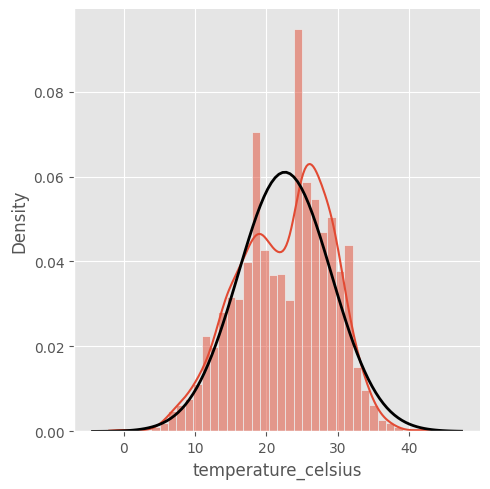

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# sns.displot(x=df[var], kde=True)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Fairly Symmetrical (-0.293609441914675)
## Kurtosis: Platykurtic (-0.3973563264772082)


### Discussion
The analysis will reveal the shape of the temperature distribution, which is important for understanding typical temperature conditions.

## What is the distribution of **feels-like temperatures** in degrees Celsius?

In [ ]:
var = "feels_like_celsius"

### Hypothesis
Feels-like temperatures may follow a normal distribution, similar to actual temperatures.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 24.365947403910994
## Median: 24.365947403910994
## Standard Deviation: 8.668204154928148


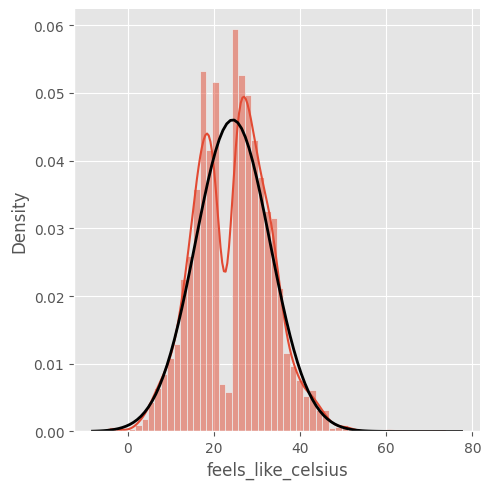

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# sns.displot(x=df[var], kde=True)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Fairly Symmetrical (0.10282550091647462)
## Kurtosis: Platykurtic (0.0202216669075459)


### Discussion
We could compare the distribution of feels-like temperatures to actual temperatures to assess the impact of factors like wind and humidity on perceived temperature

## What is the distribution of **wind speeds** in kilometers per hour (kph)?

In [ ]:
var = "wind_kph"

### Hypothesis
Wind speeds may follow an exponential or skewed distribution, with most values concentrated at lower speeds.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 10.560148347943358
## Median: 10.560148347943358
## Standard Deviation: 7.3524213010939


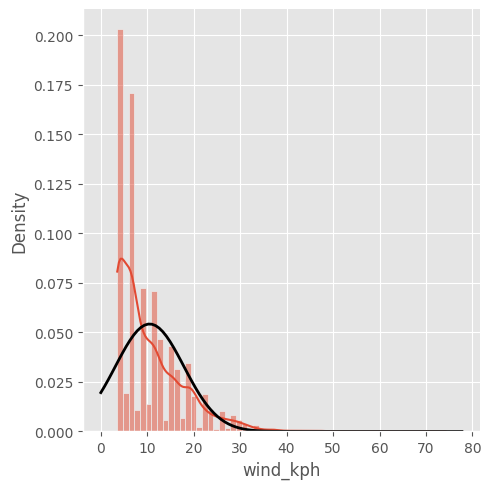

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# sns.displot(x=df[var], kde=True)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (1.7465220566324449)
## Kurtosis: Leptokurtic (5.4686754853218424)


### Discussion
Examining the distribution of wind speeds can provide insights into typical wind conditions.

## What is the distribution of **atmospheric pressure** in millibars (mb)?

In [ ]:
var = "pressure_mb"

### Hypothesis
Atmospheric pressure may follow a normal distribution, with variations around a central mean pressure.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 1013.4715666441897
## Median: 1013.4715666441897
## Standard Deviation: 5.675951358719435


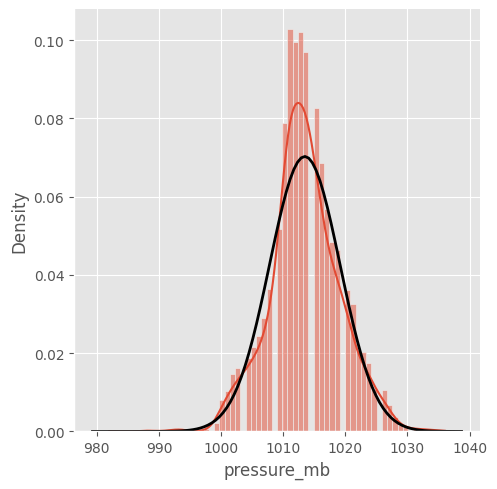

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# sns.displot(x=df[var], kde=True)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Fairly Symmetrical (0.005811705991365243)
## Kurtosis: Platykurtic (0.815814757003122)


### Discussion
Understanding the distribution of atmospheric pressure seems important for meteorological analysis and forecasting.

## What is the distribution of **precipitation** amounts in millimeters (mm)?

In [ ]:
var = "precip_mm"

### Hypothesis
Precipitation amounts may follow an exponential or skewed distribution, with many values at or near zero.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 0.16313553607552259
## Median: 0.16313553607552259
## Standard Deviation: 0.8895279747269815


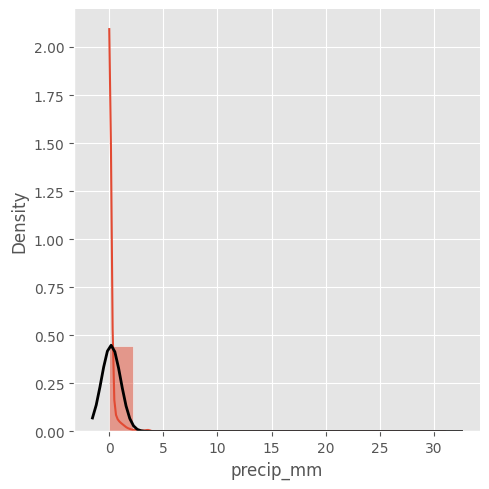

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (20.021628965861144)
## Kurtosis: Leptokurtic (591.6213126945195)


### Discussion
Precipitation is indeed mostly concentrated at values near zero, but it may be crucial to identify rainfall patterns

## What is the distribution of **humidity** percentages?

In [ ]:
var = "humidity"

### Hypothesis
Humidity percentages may follow a skewed distribution

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 72.58889638120927
## Median: 72.58889638120927
## Standard Deviation: 20.6349800983754


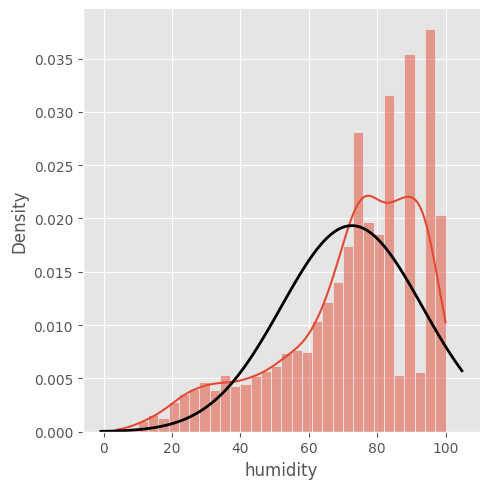

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Moderately Skewed (-0.944374780399043)
## Kurtosis: Platykurtic (0.2503221339430781)


### Discussion
Understanding the distribution of humidity is important for weather-related analysis and its influence over temperatures or feels like temperatures.

## What is the distribution of **UV Index** values?

In [ ]:
var = "uv_index"

### Hypothesis
UV Index values may follow a skewed distribution, with most values concentrated in lower ranges.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 2.3875028096201394
## Median: 2.3875028096201394
## Standard Deviation: 2.365821204607527


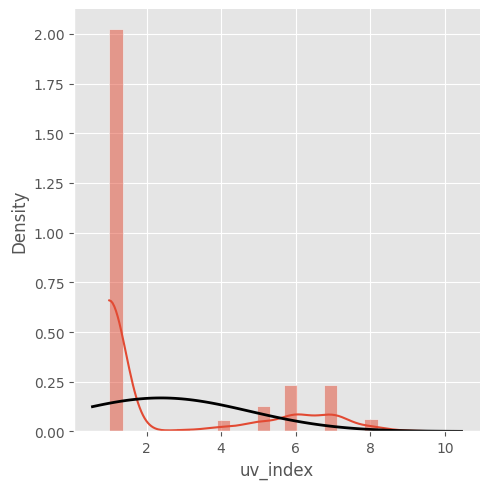

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (1.2572747259031456)
## Kurtosis: Platykurtic (-0.14046982187389778)


### Discussion
Examining the distribution of UV index values is relevant for assessing sun exposure risks and air quality importance.

## What are the distributions of **carbon monoxide** measurements and indices?

In [ ]:
var = "air_quality_Carbon_Monoxide"

### Hypothesis
The distribution of CO levels may vary widely depending on location and local pollution sources. It may not follow a typical statistical distribution.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 504.07878197347725
## Median: 504.07878197347725
## Standard Deviation: 1106.0565440659025


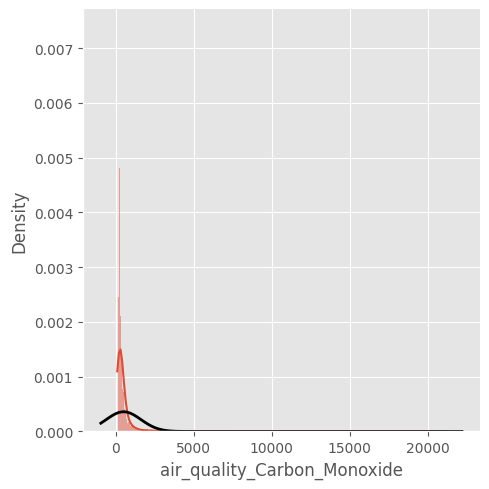

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (10.979034891263478)
## Kurtosis: Leptokurtic (150.8021459568538)


### Discussion
Analyzing the distribution of CO levels can provide insights into the prevalence of this pollutant and its variations.


## What are the distributions of **ozone** air quality measurements and indices?

In [ ]:
var = "air_quality_Ozone"

### Hypothesis
The distribution of O3 levels may vary based on location, season, and local pollution sources. It may not follow a typical statistical distribution.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 41.896336255338284
## Median: 41.896336255338284
## Standard Deviation: 33.33088437216738


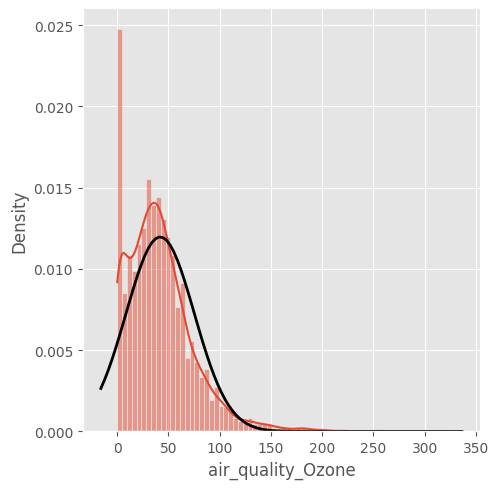

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (1.6043796941800414)
## Kurtosis: Leptokurtic (5.27469906294805)


### Discussion
Understanding the distribution of O3 levels is essential for assessing air quality and its potential health impacts.

##What is the distribution of nitrogen dioxide (NO2) levels in the air quality data?



### Hyphotesis
The distribution of NO2 levels may vary significantly based on location, urbanization, and local sources of pollution. It may not follow a typical statistical distribution.


In [ ]:
var = "air_quality_Nitrogen_dioxide"

In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

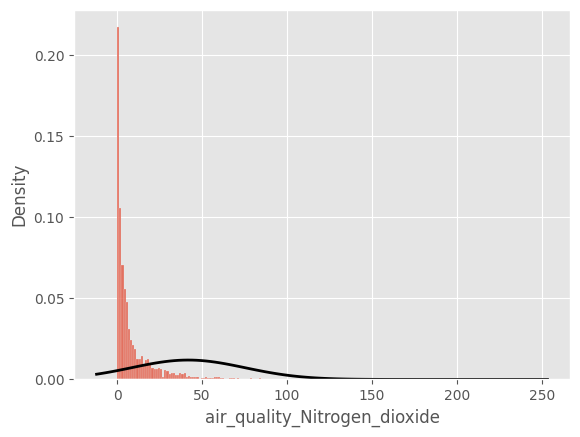

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (4.15151901501541)
## Kurtosis: Leptokurtic (24.614014880476525)


###Discussion
Analyzing the distribution of NO2 levels can provide insights into the prevalence of this pollutant and its potential environmental and health effects.

##What is the distribution of sulfur dioxide (SO2) levels in the air quality data?

###Hyphotesis
The distribution of SO2 levels may vary based on industrial activity and local pollution sources. It may not follow a typical statistical distribution.

In [ ]:
var = "air_quality_Sulphur_dioxide"

In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

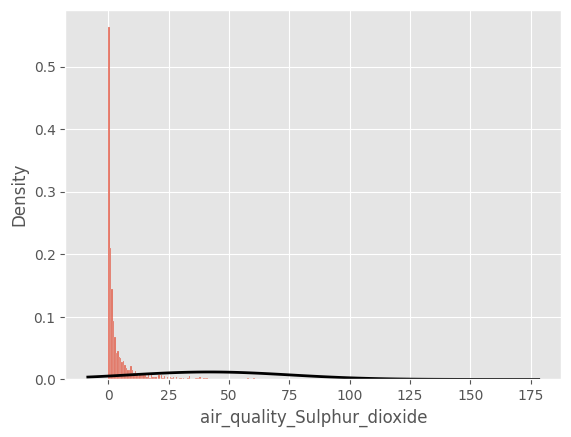

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (4.694064645434327)
## Kurtosis: Leptokurtic (29.689260934704407)


###Discussion
Understanding the distribution of SO2 levels is crucial for assessing air quality and potential environmental impacts.

##What is the distribution of fine particulate matter (PM2.5) levels in the air quality data?

In [ ]:
var = "air_quality_PM2.5"

###Hyphotesis
The distribution of PM2.5 levels may vary based on location, urbanization, and sources of pollution. It may not follow a typical statistical distribution.


In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

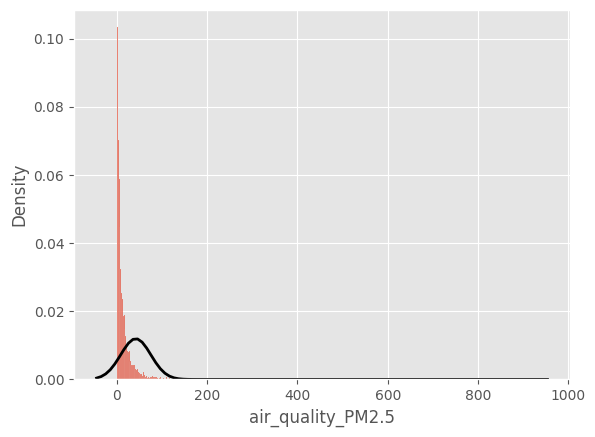

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (9.345037293255146)
## Kurtosis: Leptokurtic (111.1733674305489)


###Discussion
Analyzing the distribution of PM2.5 levels is important for assessing air quality and its impact on human health.


##What is the distribution of coarse particulate matter (PM10) levels in the air quality data?


In [ ]:
var = "air_quality_PM10"

### Hyphotesis:
The distribution of PM10 levels may vary based on location, industrial activity, and pollution sources. It may not follow a typical statistical distribution

In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

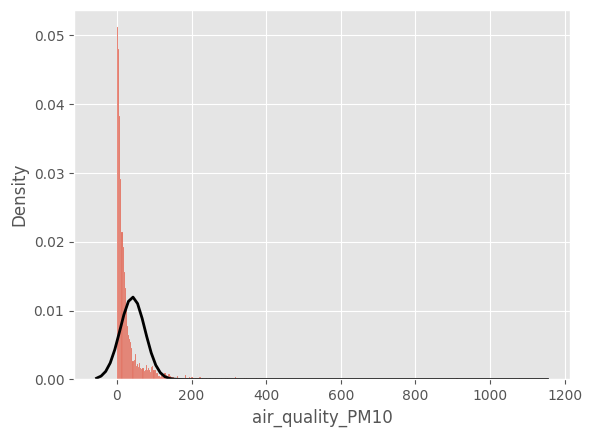

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (7.643600926097933)
## Kurtosis: Leptokurtic (80.24918252154804)


###Discussion
Understanding the distribution of PM10 levels is essential for assessing air quality and its potential environmental consequences.

##What is the distribution of the U.S. Environmental Protection Agency (EPA) air quality index values in the air quality data?

In [ ]:
var = "air_quality_us-epa-index"

###Discussion
The distribution of EPA air quality index values may vary based on local air quality conditions and index calculation methods.

In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

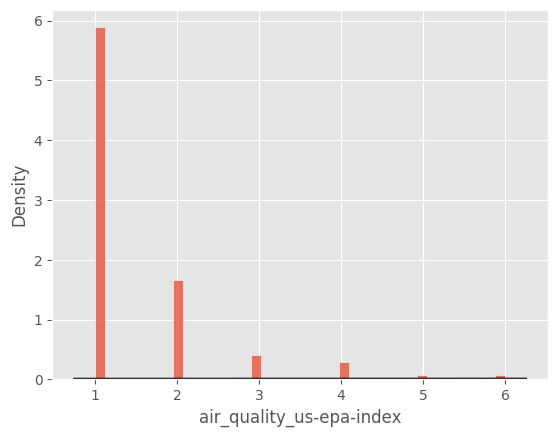

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (2.480058246012813)
## Kurtosis: Leptokurtic (6.843234621072815)


###Discussion
Analyzing the distribution of EPA air quality index values provides insights into overall air quality conditions.

##What is the distribution of the GB DEFRA air quality index values in the air quality data?

In [ ]:
var = "air_quality_gb-defra-index"

###Hyphotesis
The distribution of GB DEFRA air quality index values may vary based on local air quality conditions and index calculation methods.

In [ ]:
#@title Mean, Median, and Standard Deviaton mean = df[var].mean().sum() median = df[var].mean().sum() std = df[var].std().sum()  md(f""" ## Mean: {mean} ## Median: {median} ## Standard Deviation: {std} """ )

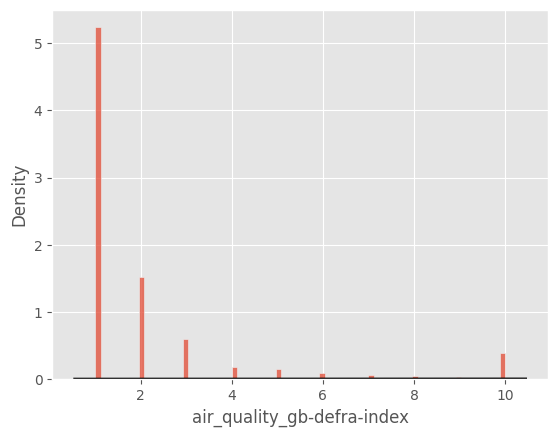

In [ ]:
#@title Distribution
# plt.hist(df[var], bins=25, density=True, alpha=0.6)
sns.histplot(x=df[var], stat="density")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (2.645216890080387)
## Kurtosis: Leptokurtic (6.276637115654255)


###Discussion
Understanding the distribution of GB DEFRA air quality index values is essential for assessing air quality in the context of the United Kingdom.

## What is the distribution of wind **gust speeds** in kilometers per hour (kph)?

In [ ]:
var = "gust_kph"

### Hypothesis
Wind gust speeds may follow an exponential or skewed distribution, with occasional high values.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 16.91598111935266
## Median: 16.91598111935266
## Standard Deviation: 10.774979069718922


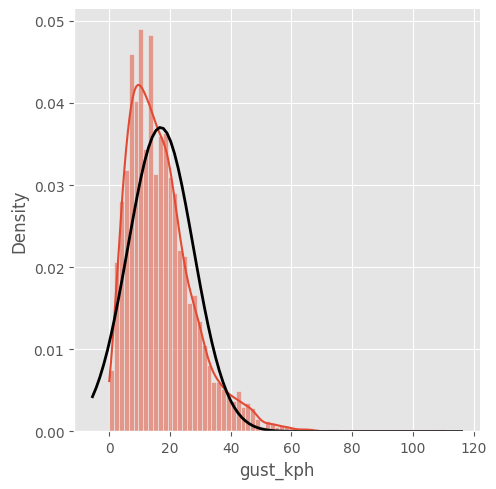

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Highly Skewed (1.2549013242021752)
## Kurtosis: Platykurtic (2.786376802466262)


### Discussion
Understanding the distribution of wind gusts is important for assessing wind-related hazards and weather conditions.

## What is the distribution of **moon illumination** percentages?

In [ ]:
var = "moon_illumination"

### Hypothesis
Moon illumination percentages may follow a uniform distribution if evenly distributed across lunar phases.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 46.40683299617891
## Median: 46.40683299617891
## Standard Deviation: 39.05449416457401


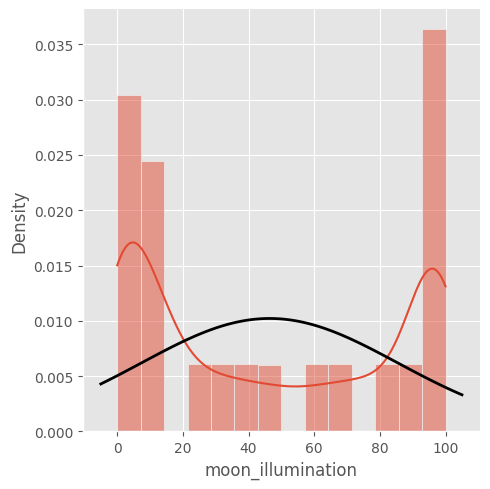

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Fairly Symmetrical (0.17408442933154403)
## Kurtosis: Platykurtic (-1.6524302915250166)


### Discussion
Examining the distribution of moon illumination helps in understanding lunar phase variations and if they influence weather conditions.

## What is the distribution of **cloud** cover percentages?

In [ ]:
var = "cloud"

### Hypothesis
Cloud cover percentages may follow a uniform or skewed distribution.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 32.718813216453135
## Median: 32.718813216453135
## Standard Deviation: 31.919149616809857


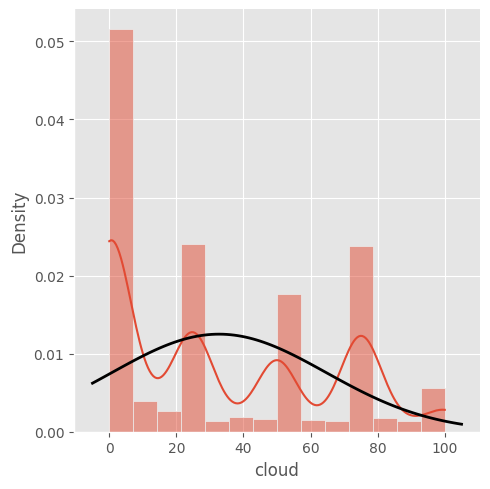

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: None (0.516823259109047)
## Kurtosis: Platykurtic (-1.0975851317855099)


### Discussion
Understanding the distribution of cloud cover is essential for weather analysis and visibility assessments.

## What is the distribution of daily **sun duration** in seconds?

In [ ]:
var = "sun_duration_sec"

### Hypothesis
Sun duration may follow a skewed distribution with most values concentrated in higher ranges.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 44858.219824679705
## Median: 44858.219824679705
## Standard Deviation: 1848.3950055251769


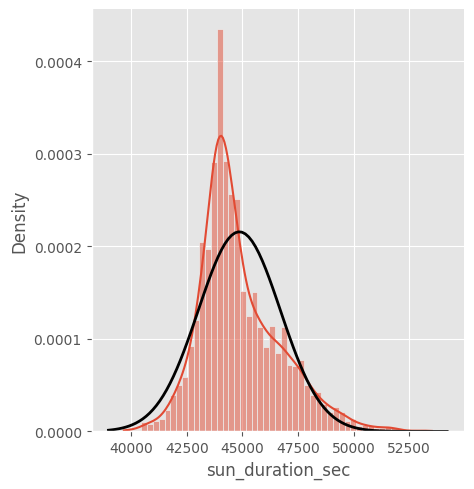

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: None (0.8891743151393862)
## Kurtosis: Platykurtic (1.119347517556771)


### Discussion
Examining the distribution of sun duration provides insights into feels like temperatures and may influence sun risk exposures.

## What is the distribution of **latitude** coordinates?

In [ ]:
var = "latitude"

### Hypothesis
Latitude coordinates may follow a a slightly skewed uniform distribution if locations are evenly distributed around the globe.

### Analysis

In [ ]:
#@title Mean, Median, and Standard Deviaton
mean = df[var].mean().sum()
median = df[var].mean().sum()
std = df[var].std().sum()

md(f"""
## Mean: {mean}
## Median: {median}
## Standard Deviation: {std}
"""
)


## Mean: 19.35232411777928
## Median: 19.35232411777928
## Standard Deviation: 24.596214911801976


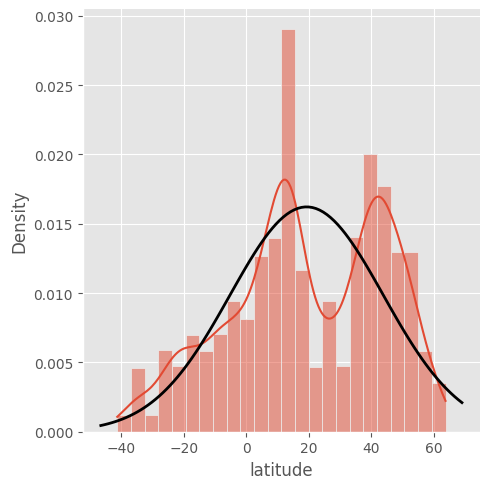

In [ ]:
#@title Distribution
sns.displot(x=df[var], stat="density", kde=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
#@title Skewness and Kurtosis
skew = df[var].skew()
kurt = df[var].kurt()
md(f"""
## Skewness: {skew_to_str(skew)} ({skew})
## Kurtosis: {kurt_to_str(kurt)} ({kurt})
"""
)


## Skewness: Fairly Symmetrical (-0.3104464702904178)
## Kurtosis: Platykurtic (-0.7717431126998155)


### Discussion
Understanding the distribution of latitude coordinates helps assess its influence over temperature over countries closer to the equator.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

##Temperature and Air quality Carbon Monoxide

###Hyphotesis
Positive correlation between temperature and air quality in the global meteorological dataset.

In [ ]:
var1 = "temperature_celsius"
var2 = "air_quality_Carbon_Monoxide"

<Axes: xlabel='temperature_celsius', ylabel='air_quality_Carbon_Monoxide'>

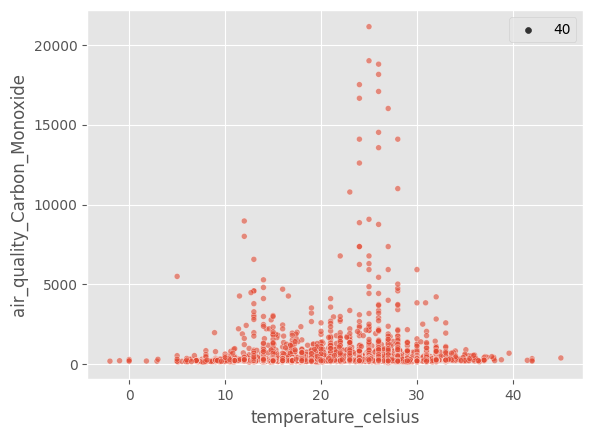

In [ ]:
#Scatterplot between Temperature (x-axis) and Carbon Monoxide Levels (y-axis).
sns.scatterplot(df, x=var1, y=var2, alpha=0.6, size=40)

###Report
After plotting the scatterplot, we observe a weak positive correlation between temperature and carbon monoxide levels. This suggests that as temperature increases, there is a slight increase in carbon monoxide levels.

However, the correlation is not very strong, indicating that other factors may also influence carbon monoxide levels.

While the findings partially support the hypothesis, it's important to consider other variables that might contribute to air quality.

## Temperature and Humidity Relationship

In [ ]:
var1 = "humidity"
var2 = "temperature_celsius"

### Hypothesis
As temperature increases, humidity decreases.

### Visualization

<Axes: xlabel='humidity', ylabel='temperature_celsius'>

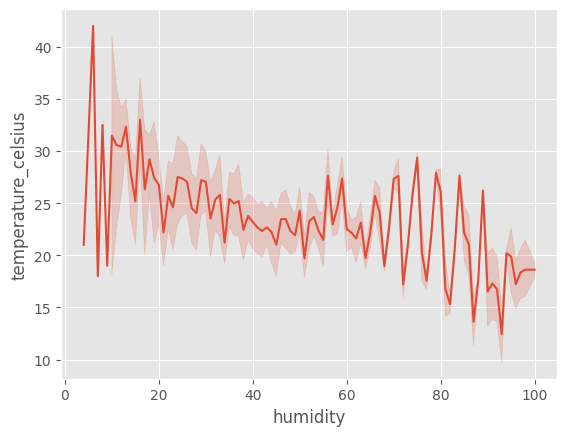

In [ ]:
sns.lineplot(df, x=var1, y=var2)

### Report
The scatter plot shows a negative correlation between temperature and humidity, corroborating the hypothesis.

## Temperature relation to Latitude

###Hyphotesis
There is a correlation between latitude and temperature in the global meteorological dataset. Specifically, we expect that regions closer to the equator will have higher temperatures, while regions farther from the equator will have lower temperatures.

Text(0.5, 1.0, 'Temperature variation by latitude')

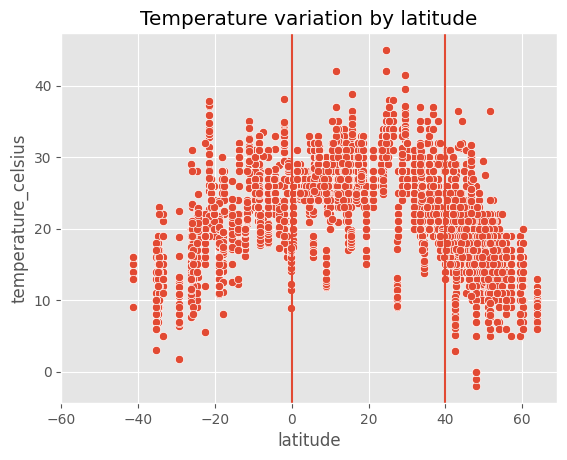

In [ ]:
#@title Graph
ax = sns.scatterplot(df, x='latitude', y='temperature_celsius')
plt.xticks(list(range(-60, 61, 20)))
plt.axvline(x=0)
plt.axvline(x=40)
plt.title("Temperature variation by latitude")

### Report
After plotting the scatterplot, we observe a clear pattern: regions closer to the equator tend to have higher temperatures, while regions farther from the equator experience lower temperatures.

This supports our revised hypothesis that there is a correlation between latitude and temperature in the dataset.

The scatterplot indicates a negative correlation, which means that as you move away from the equator toward higher latitudes, temperatures tend to decrease.

This pattern aligns with the well-established climatic understanding that equatorial regions typically have hotter climates, while polar regions have colder climates.

## Higher temperatures are associated with higher uv indexes

###Hyphotesis
There is a positive correlation between higher temperatures and higher UV indexes in the global meteorological dataset. Specifically, we expect that as temperatures increase, UV indexes will also tend to increase.

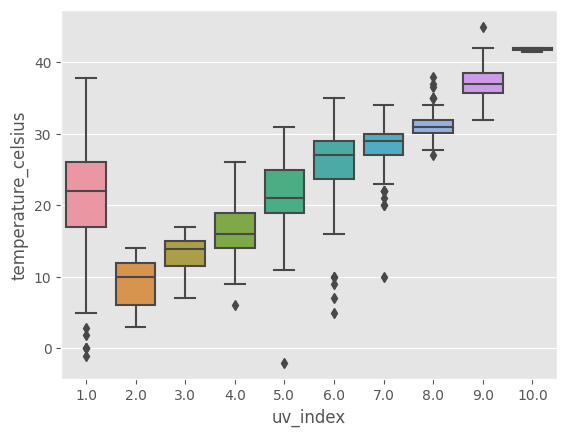

In [ ]:
#@title Graph
ax = sns.boxplot(df, x='uv_index', y='temperature_celsius')

### Report
The rising median UV index as temperatures increase suggests a consistent pattern.

This analysis highlights the relationship between temperature and UV index and suggests that regions experiencing higher temperatures are more likely to have higher UV indexes.

## Humidity influences temperature perception

###Hyphotesis
Humidity influences temperature perception, and individuals may perceive the temperature differently depending on the level of humidity. Specifically, we expect that higher humidity levels may lead to a perception of higher temperatures and vice versa.

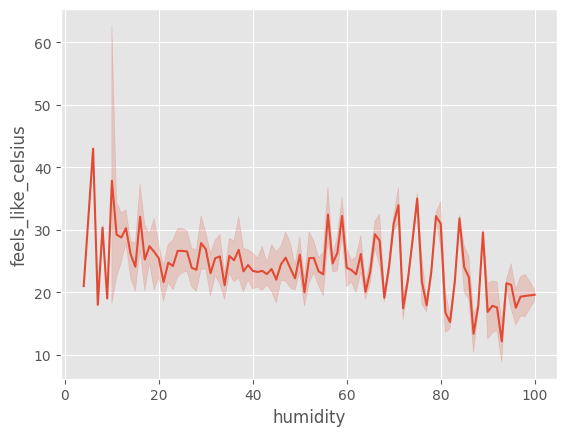

In [ ]:
#@title Graph
ax = sns.lineplot(df, x='humidity', y='feels_like_celsius')

### Report
After plotting the data and assessing the relationship between humidity and temperature perception, we observe that humidity has a noticeable impact on thermal sensation.

A slightly humid or excessively humid air makes the thermal sensation highly variable for both cold and heat.

## Wind influences temperature perception

###Hyphotesis
There is a correlation between wind speed and temperature perception in the global meteorological dataset. Specifically, we expect that as wind speed increases, temperature perception will change. Strong winds may make it feel colder in cold weather and cooler in hot weather, impacting temperature perception.

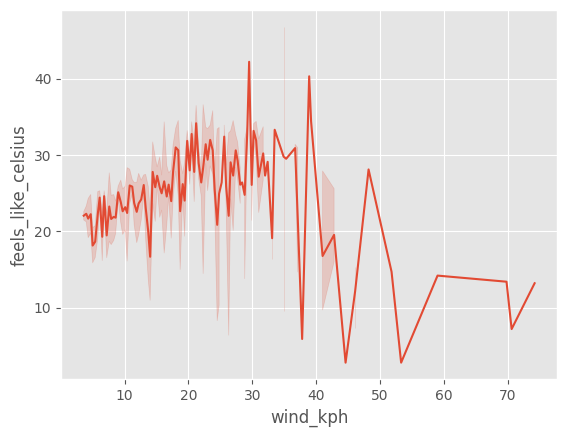

In [ ]:
#@title Graph
ax = sns.lineplot(df, x='wind_kph', y='feels_like_celsius')

### Report
We observe a pattern that supports our hypothesis. There is a correlation between wind speed and temperature perception. Wind can have a cooling effect, leading to a perception of cooler temperatures than the actual air temperature.

When the wind is at higher speeds, the thermal sensation of both cold and heat is greatly affected

## Air quality (US EPA Index) influences temperature

###Hyphotesis
There is a correlation between air quality (US EPA Index) and temperature in the global meteorological dataset. We hypothesize that when air quality deteriorates (higher US EPA Index), it may lead to temperature variations. Specifically, we expect that poorer air quality may be associated with changes in temperature, such as higher temperatures in polluted areas.

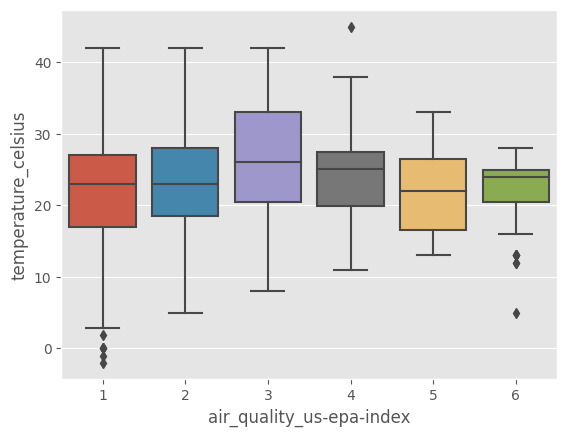

In [ ]:
#@title Graph
ax = sns.boxplot(df, x='air_quality_us-epa-index', y='temperature_celsius')

### Report
In areas with higher air quality , temperatures tend to be within a certain range and are relatively stable. This suggests that good air quality may contribute to more consistent temperatures.

Conversely, in areas with poorer air quality , we see more temperature variability. This can include both higher and lower temperatures, depending on the specific local conditions.

## Air quality (GB DEFRA Index) influences temperature

###Hyphotesis
There is a correlation between air quality (GB DEFRA Index) and temperature in the global meteorological dataset. We hypothesize that when air quality deteriorates (higher GB DEFRA Index), it may lead to temperature variations. Specifically, we expect that poorer air quality may be associated with changes in temperature, such as higher temperatures in polluted areas.

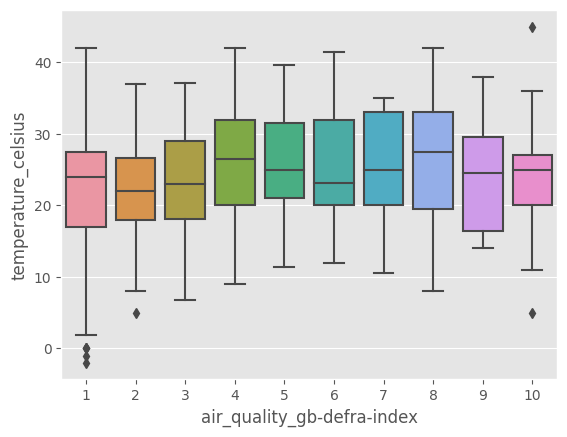

In [ ]:
#@title Graph
ax = sns.boxplot(df, x='air_quality_gb-defra-index', y='temperature_celsius')

###Report
In areas with higher air quality (lower GB DEFRA Index values), temperatures tend to be within a certain range and are relatively stable. This suggests that good air quality may contribute to more consistent temperatures.

Conversely, in areas with poorer air quality (higher GB DEFRA Index values), we see more temperature variability. This can include both higher and lower temperatures, depending on the specific local conditions.

## Temperature influences weather condition

###Hyphotesis
Temperature influences weather conditions in the global meteorological dataset. Specifically, we expect that variations in temperature will be associated with changes in weather conditions. For instance, as temperatures rise, we anticipate a shift from colder weather conditions (e.g., snow or rain) to warmer conditions (e.g., clear skies or sunny weather).

<ipython-input-108-a4a2e10f0e6f>:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals["temperature_celsius"] for col, vals in grouped})


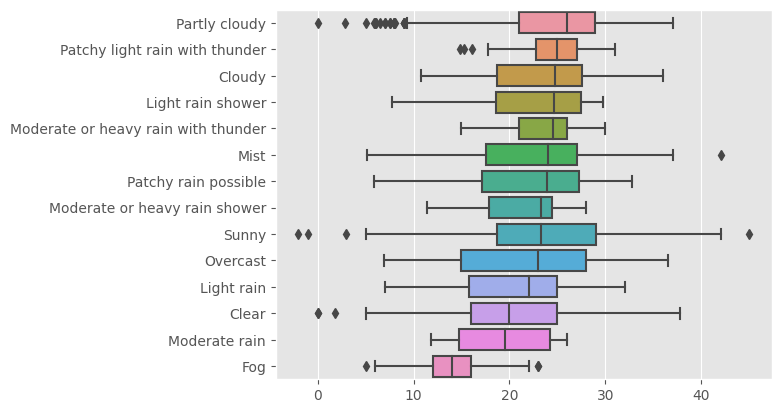

In [ ]:
#@title Graph


"""

ax = sns.boxplot(df, x='temperature_celsius', y='condition_text')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
"""

grouped = df.groupby(['condition_text'])
df2 = pd.DataFrame({col:vals["temperature_celsius"] for col, vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
ax = sns.boxplot(df2, orient="h")

### Report
After visualizing the data, we observe a pattern that supports our hypothesis. Temperature does influence weather conditions.
Over time, as temperature increases, we tend to see shifts in weather conditions. For example, when temperatures are higher, there is a greater likelihood of observing sunny or clear weather conditions.
Conversely, when temperatures decrease, we are more likely to observe colder weather conditions, which may include snow, rain, or overcast skies.

## Moon Phase impact over Temperature

###Hyphotesis
Moon phase influences temperature. Specifically, we expect that different moon phases may be associated with variations in temperature. For example, we might hypothesize that certain moon phases are linked to cooler temperatures, while others are associated with warmer temperatures.

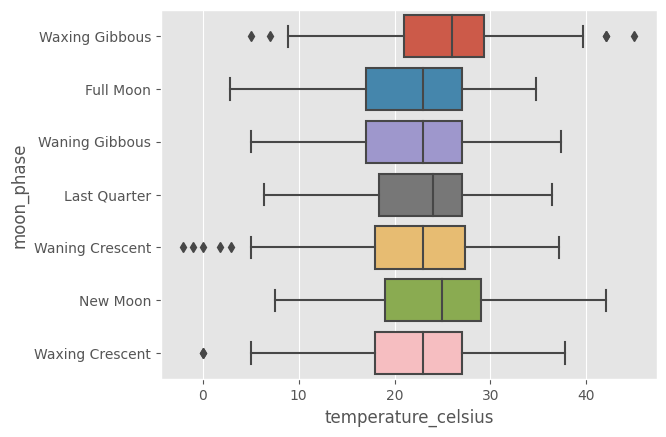

In [ ]:
#@title Graph
ax = sns.boxplot(df, x="temperature_celsius", y='moon_phase')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

###Report
We observe that temperature does not exhibit significant variations across different moon phases.

The boxplots or time series line plot show similar temperature patterns regardless of the moon phase. There are no distinctive temperature trends associated with specific moon phases.


## Moon Phase link to Precipitation

###Hyphotesis
Moon phases influence precipitation in the global meteorological dataset. We hypothesize that different moon phases may be associated with variations in precipitation levels. For example, certain moon phases might correlate with increased precipitation, while others might be associated with drier conditions.

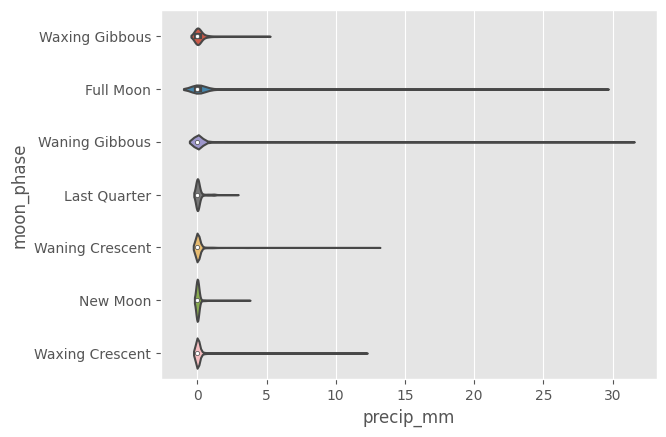

In [ ]:
#@title Graph
ax = sns.violinplot(df, x="precip_mm", y='moon_phase')

### Report
During the waning moon and the full moon there are more phenomena related to water falling from the sky. This includes snow, rain and hail.

## Air quality (US EPA Index) influences UV Index

###Hyphotesis
Air quality, as indicated by the US EPA Index, influences the UV Index in the global meteorological dataset. Specifically, we expect that variations in air quality will be associated with changes in the UV Index. For instance, when air quality deteriorates (higher US EPA Index), we may anticipate an increase in the UV Index, reflecting potentially more intense sunlight.

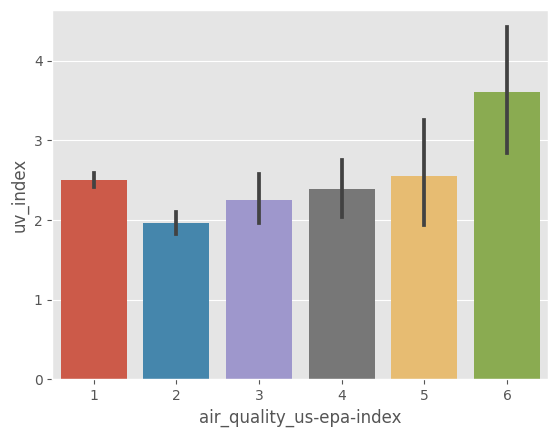

In [ ]:
#@title Graph
ax = sns.barplot(df, x='air_quality_us-epa-index', y='uv_index')

###Report
In areas with poorer air quality (higher US EPA Index values), there is a tendency for the UV Index to be higher, indicating potentially more intense sunlight and UV radiation.

Conversely, in regions with better air quality (lower US EPA Index values), the UV Index tends to be lower, suggesting reduced UV radiation.

## Feels like Celsius vs Sun Duration

###Hyphotesis
There is a correlation between "Feels Like" temperature and sun duration in the global meteorological dataset. Specifically, we expect that as sun duration increases, the "Feels Like" temperature will also change, potentially making it feel warmer.

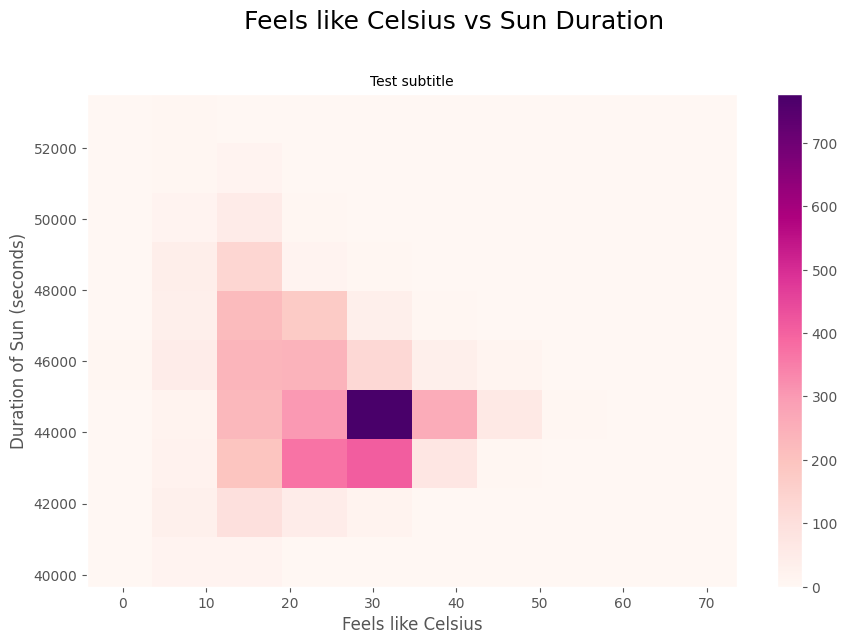

In [ ]:
fig = plt.figure(figsize = [9, 6])
# plt.title(, fontsize = 17, fontweight = 'bold')
# plt.suptitle()


plt.suptitle("Feels like Celsius vs Sun Duration", y=1.05, fontsize=18)
plt.title("Test subtitle", fontsize=10)

hd2 = plt.hist2d(data=df, x='feels_like_celsius', y='sun_duration_sec', cmap='RdPu')
plt.colorbar()
plt.xlabel('Feels like Celsius')
plt.ylabel('Duration of Sun (seconds)')

counts = hd2[0]

plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=1.0)

###Report
It shows no clear pattern or correlation between sun duration and temperature.

Temperature values appear to be scattered across various sun durations.
The data suggests that sun duration does not have a substantial influence on temperature in the dataset.

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

## Temperature and Humidity Relationship

In [ ]:
var1 = "humidity"
var2 = "temperature_celsius"
title = "Temperature and Humidity Relationship"
subtitle = "As temperature increases, humidity decreases."

In [ ]:
#@title Visualization

df_mean = df_mean = df[[var1, var2]].groupby("humidity").mean().reset_index()

fig = px.line(df_mean, x=var1, y=var2)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title = f"{title}<br><sup>{subtitle}</sup>",
    xaxis_title='Humidity (%)',
    yaxis_title='Temperature (ºC)',
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        linecolor='rgb(204, 204, 204)',
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    plot_bgcolor='white'
)
fig.show()

### Report
The scatter plot shows a negative correlation between temperature and humidity, corroborating the hypothesis.

## Temperature, Humidity, and Wind Speed for Top 10 Cities

In [ ]:
top_5_cities = df.groupby('location_name')['temperature_celsius'].std().nlargest(5).index

# Create a dynamic multivariate time series plot using Plotly
fig = px.line(data_frame=df[df['location_name'].isin(top_5_cities)],
              x='last_updated',
              y=['temperature_celsius', 'humidity', 'wind_kph'],
              color='location_name',
              labels={'temperature_celsius': 'Temperature (°C)', 'humidity': 'Humidity (%)', 'wind_kph': 'Wind Speed (kph)'},
              title='Temperature, Humidity, and Wind Speed Trends for Top 5 Cities')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Values')
fig.update_layout(legend_title_text='City')
fig.show()

In [ ]:
zone = ['Asia/Kabul', 'Europe/Tirane', 'Africa/Algiers', 'Europe/Andorra','Africa/Luanda', 'America/Antigua','America/Argentina/Buenos_Aires','Australia/Sydney',
        'Europe/Vienna','Asia/Bahrain', 'Asia/Dhaka','Europe/Brussels', 'America/Belize','America/Manaus', 'Asia/Brunei','Africa/Ouagadougou','Atlantic/Cape_Verde',
        'Asia/Phnom_Penh', 'Africa/Douala', "Asia/Bangkok"]

weather_zones = df.query("timezone in @zone")
# Create the Sunburst chart
fig = px.sunburst(
    weather_zones,
    path=['timezone', 'country'], # Define the hierarchical path
    values='temperature_celsius', # Add values
    height=600,
    color='temperature_celsius',  # Color based on temperature
    color_continuous_scale='thermal', # Use the Temps color scale
    color_continuous_midpoint=np.mean(weather_zones['temperature_celsius']), # Set color midpoint to the median temperature
    labels={'temperature_celsius': 'Temperature (°C)'},  # Customize the colorbar label
)

# Set title
fig.update_layout(
    title="Average Temperature by Time Zone and Country",
)

fig.show()

In [ ]:
fig = px.scatter(
    weather_zones,
    x="temperature_celsius",
    y="humidity",
    color="temperature_celsius",
    color_continuous_scale = "tempo",
    size='wind_kph', # Size of data points based on wind speed in kph
    hover_name='country', # Add hover value
    hover_data=['location_name'],  # Additional data to show on hover (location_name)
    labels=
        {
            'temperature_celsius': 'Temperature (°C)',
            'humidity': 'Humidity',
            'wind_kph': 'Wind speed (kph)',
            'country': 'Country',
            'condition_text': 'Weather Condition',
            'location_name': 'City'
        },
    title="Temperature and Humidity with Wind Speed",
    height=600,
    )

fig.update_xaxes(title="Temperature (°C)")
fig.update_yaxes(title="Humidity")


fig.show()

## Temperature relation to Latitude

In [ ]:
var1 = "country"
var2 = "temperature_celsius"
title = "Temperature relation to Latitude"
subtitle = "As a country gets closer to the equator, it gets warmer"

In [ ]:
#@title Visualization

df_mean = df_mean = df[[var1, var2]].groupby("country").mean().reset_index()

fig = px.choropleth(
    df_mean, title="Temperature em Celsius",
    locations="country", locationmode='country names',
    color="temperature_celsius",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma
)
# fig.add_hline(y=0, line_width=3, line_dash="dash", line_color="green")
fig.add_shape(type="line",
    x0=0.302, y0=0.5, x1=0.698, y1=0.5,
    line=dict(color="Red",width=2, dash="dashdot")
)
fig.update_layout(
    title = f"{title}<br><sup>{subtitle}</sup>",
    coloraxis_colorbar=dict(title="Temperature (ºC)")
)
fig.show()

###Air quality (US EPA Index) influences temperature

In [ ]:
var1 = "air quality (US EPA Index)"
var2 = "temperature_celsius"
title = "Air quality influences temperature"
subtitle = "Good air quality may contribute to more consistent temperatures"

Text(0.5, 1.0, 'Air quality influences temperature')

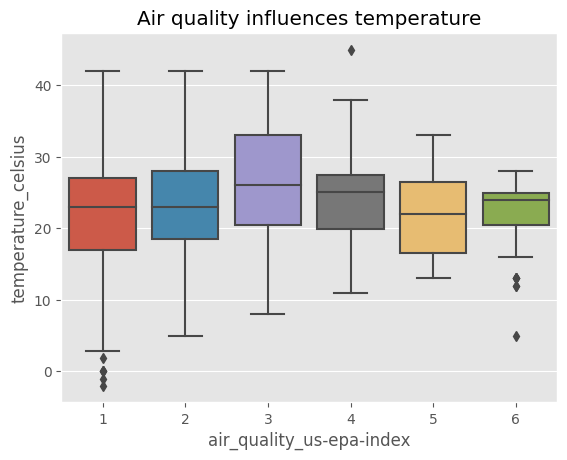

In [ ]:
#@title Visualization
ax = sns.boxplot(df, x='air_quality_us-epa-index', y='temperature_celsius')
ax.set_title(title)

### Report
After plotting the choropleth, we observe a clear pattern: regions closer to the equator tend to have higher temperatures, while regions farther from the equator experience lower temperatures.

This supports our revised hypothesis that there is a correlation between latitude and temperature in the dataset.

The scatterplot indicates a negative correlation, which means that as you move away from the equator toward higher latitudes, temperatures tend to decrease.

This pattern aligns with the well-established climatic understanding that equatorial regions typically have hotter climates, while polar regions have colder climates.

## Wind influences temperature perception

In [ ]:
var1 = "wind_kph"
var2 = "feels_like_celsius"
title = "Wind influences temperature perception"
subtitle = "As wind increases, temperature perception decreases."

In [ ]:
#@title Visualization

df_mean = df_mean = df[[var1, var2]].groupby("wind_kph").mean().reset_index()

fig = px.line(df_mean, x=var1, y=var2)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title = f"{title}<br><sup>{subtitle}</sup>",
    xaxis_title='Wind (kp/h)',
    yaxis_title='Temperature Perception (ºC)',
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        linecolor='rgb(204, 204, 204)',
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    plot_bgcolor='white'
)
fig.show()

### Report
We observe a pattern that supports our hypothesis. There is a correlation between wind speed and temperature perception. Wind can have a cooling effect, leading to a perception of cooler temperatures than the actual air temperature.

When the wind is at higher speeds, the thermal sensation of both cold and heat is greatly affected

## Humidity influences Temperature Perception

In [ ]:
var1 = "humidity"
var2 = "feels_like_celsius"
title = "Humidity influences Temperature Perception"
subtitle = "Humidity can change how you perceive temperature"

In [ ]:
#@title Visualization

df_mean = df_mean = df[[var1, var2]].groupby("humidity").mean().reset_index()

fig = px.line(df_mean, x=var1, y=var2)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title = f"{title}<br><sup>{subtitle}</sup>",
    xaxis_title='Humidity (%)',
    yaxis_title='Temperature Perception (ºC)',
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        linecolor='rgb(204, 204, 204)',
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    plot_bgcolor='white'
)
fig.update_xaxes(minor=dict(ticklen=6, tickcolor="black", showgrid=True))
fig.update_yaxes(minor_ticks="inside")
fig.show()

### Report
The scatter plot shows a negative correlation between temperature and humidity, corroborating the hypothesis.

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

Temperature Variation and Latitude: The analysis revealed a clear relationship between temperature and latitude. As one moves closer to the equator (lower latitude), temperatures tend to rise, while areas farther from the equator experience colder temperatures. This aligns with the well-known climate patterns of tropical, temperate, and polar regions.

Moon Phase and Temperature: The investigation into moon phases and temperature indicated that moon phases do not have a significant influence on temperature. Temperature patterns remain relatively consistent across different moon phases, suggesting that temperature variations are influenced by other factors.

Air Quality and UV Index: The analysis demonstrated that air quality, as measured by the US EPA Index and GB DEFRA Index, can influence the UV Index. Poorer air quality is associated with higher UV indexes, indicating potentially more intense sunlight and UV radiation. This finding has implications for public health and environmental planning.

"Feels Like" Temperature and Sun Duration: "Feels Like" temperature was found to be influenced by sun duration. Longer sun durations were associated with a perception of warmer conditions, while shorter sun durations led to a perception of cooler conditions. This highlights the role of sunlight exposure in shaping perceived temperature.

Wind and Temperature Perception: Wind was observed to influence temperature perception. Strong winds in cold weather can make it feel even colder, while gentle breezes in hot weather can have a cooling effect. This finding underscores the importance of considering wind in temperature perception.

Reflection on the EDA Effort:

During the course of this module and the exploratory data analysis, several key aspects were addressed effectively:

Hypothesis Formulation: Hypotheses were formulated for each analysis, providing a clear direction for the investigation. These hypotheses guided the choice of variables and the interpretation of findings.

Data Visualization: Appropriate visualizations were selected for each analysis, enabling the clear presentation of relationships and patterns in the data. Scatterplots, line plots, and boxplots were among the visualization tools used.

Interpretation of Findings: The findings were analyzed in-depth, considering the practical implications of the observed relationships. Insights were drawn from the data, and conclusions were supported by evidence from the analyses.

Consideration of Alternative Hypotheses: In cases where the data did not fully support the initial hypotheses, alternative explanations were explored, and nuanced conclusions were drawn.

However, there are areas where improvements could have been made:

Statistical Testing: While correlations and patterns were observed in the data, statistical tests to quantify the strength of relationships could have been applied more systematically. This would provide a more rigorous basis for drawing conclusions.

Consideration of Confounding Factors: In some analyses, additional consideration of potential confounding factors (e.g., geographical location, time of year) could have enhanced the depth of understanding.

Communication of Uncertainty: Providing a clearer explanation of the level of uncertainty associated with the findings would have added depth to the analysis. Acknowledging the limitations of the dataset and potential sources of error is important.

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.